# **Pattern Recognition and Machine Learning**
> 📘 Tutorial
>
> Week 7: SVM & Decision Tree

## **Face Detection using SVM**
### 1. Retrieve data

In [2]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=88)

In [3]:
faces

{'data': array([[ 82.666664,  87.333336,  65.333336, ..., 106.333336, 140.      ,
         199.33333 ],
        [ 52.666668,  49.666668,  69.333336, ..., 235.66667 , 228.66667 ,
         222.33333 ],
        [ 37.      ,  39.      ,  41.666668, ...,  96.666664,  72.      ,
          59.333332],
        ...,
        [228.33333 , 224.66667 , 216.66667 , ..., 150.33333 , 145.66667 ,
         165.      ],
        [ 97.      , 118.666664, 133.33333 , ..., 219.33333 , 210.      ,
         142.      ],
        [ 39.333332,  79.      , 110.333336, ...,  24.      ,  34.333332,
          23.666666]], dtype=float32),
 'images': array([[[ 82.666664,  87.333336,  65.333336, ..., 105.666664,
          100.      ,  90.666664],
         [ 89.666664,  95.      ,  53.666668, ..., 106.666664,
          102.      ,  94.666664],
         [ 94.666664,  87.666664,  60.      , ...,  85.333336,
           98.      ,  94.666664],
         ...,
         [ 22.333334,  26.      ,  32.333332, ..., 102.333336,
     

### 2. Explore data

In [5]:
faces.target_names

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

In [6]:
faces.images.shape

(1140, 62, 47)

In [4]:
n_samples = faces.images.shape[0]
n_features = faces.data.shape[1]
n_classes = faces.target_names.shape[0]

print(f'Numbers of samples: {n_samples}')
print(f'Numbers of features: {n_features}')
print(f'Numbers of classes: {n_classes}')

Numbers of samples: 1140
Numbers of features: 2914
Numbers of classes: 5


In [5]:
faces.data.shape

(1140, 2914)

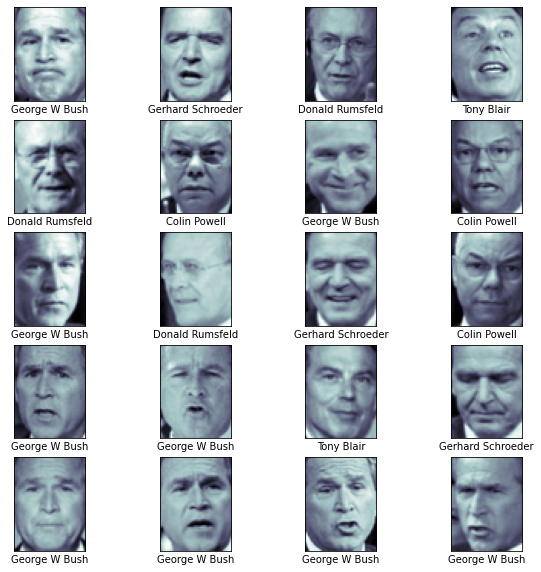

In [10]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(5, 4, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

### 3. Split data into train/test sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
    train_size = 0.8, random_state=14)

In [12]:
X_train.shape

(912, 2914)

In [13]:
X_test.shape

(228, 2914)

In [14]:
y_train.shape

(912,)

In [15]:
y_test.shape

(228,)

### 4. Build model

In [16]:
from sklearn.svm import SVC

model = SVC()

### 5. Train and predict

In [21]:
model.fit(X_train, y_train)

y_result = model.predict(X_test)

### 6. Evaluate the result

In [22]:
from sklearn import metrics
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

print("Accuracy:", metrics.accuracy_score(y_test, y_result))
print("Precision:", metrics.precision_score(y_test, y_result, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_result, average='weighted'))
print("F1-score:", metrics.f1_score(y_test, y_result, average='weighted'))

Accuracy: 0.7412280701754386
Precision: 0.7683334127035818
Recall: 0.7412280701754386
F1-score: 0.7274623927146201


### 7. Print classification report

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_result, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.80      0.66      0.73        50
  Donald Rumsfeld       1.00      0.50      0.67        20
    George W Bush       0.69      0.96      0.80       101
Gerhard Schroeder       0.70      0.37      0.48        19
       Tony Blair       0.85      0.58      0.69        38

         accuracy                           0.74       228
        macro avg       0.81      0.61      0.67       228
     weighted avg       0.77      0.74      0.73       228



### 8. Visualize the confusion matrix

Text(101.4, 0.5, 'Predicted label')

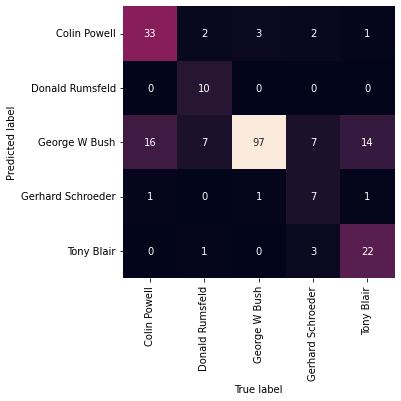

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_result)
plt.figure(figsize=(7,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=faces.target_names,
yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [25]:
params = model.get_params()

params

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### 9. Tune parameter

In [ ]:
# Here we will adjust C (which controls the margin hardness) and gamma
# (which controls the size of the radial basis function (RBF) kernel),
# and determine the best model:
from sklearn.model_selection import GridSearchCV

model = SVC()

# Parameter setup
param_grid = [
    {'C': [0.5, 0.1, 1, 5, 10],
     'kernel': ['linear'],
     'class_weight': ['balanced']},
    {'C': [0.5, 0.1, 1, 5, 10],
     'gamma': [0.0001, 0.001, 0.01, 0.1, 0.005, 0.05, 0.5],
     'kernel': ['rbf'],
     'class_weight': ['balanced']}
]

# Run the Grid Search and fit the training data
grs = GridSearchCV(model, param_grid)

grs.fit(X_train, y_train)

In [ ]:
# Output best value
print("Best Hyper Parameters:",grs.best_params_)

In [ ]:
# Make prediction and calculate metrics
model_best = grs.best_estimator_

y_result = model_best.predict(X_test)

# Evaluate the model
print("Accuracy:", metrics.accuracy_score(y_test, y_result))
print("Precision:", metrics.precision_score(y_test, y_result, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_result, average='weighted'))
print("F1-score:", metrics.f1_score(y_test, y_result, average='weighted'))

In [ ]:
plt.figure(figsize=(8,6))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=faces.target_names,
yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')

### 10. Display misclassified faces

In [ ]:
fig, ax = plt.subplots(4, 6, figsize=(10,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(faces.target_names[y_test[i]].split()[-1])
    axi.set_ylabel(faces.target_names[y_result[i]].split()[-1],
                   color='black' if y_result[i] == y_test[i] else 'red')

fig.suptitle('Predicted Names: Incorrect Labels in Red', size=14);


## **Breast Cancer Detection using Decision Tree**
### 1. Retrieve data

In [ ]:
from sklearn.datasets import load_breast_cancer

breast_cancer_dataset = load_breast_cancer()

In [ ]:
breast_cancer_dataset

### 2. Explore data

In [ ]:
breast_cancer_dataset.target_names

In [ ]:
breast_cancer_dataset.data.shape

In [ ]:
breast_cancer_dataset.feature_names

In [ ]:
breast_cancer_dataset.target.shape

### 3. Split data into train/test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_dataset.data, breast_cancer_dataset.target,
    test_size = 0.2, random_state = 14)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

### 4. Build model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

### 5. Train and predict

In [ ]:
model.fit(X_train,y_train)

y_result= model.predict(X_test)

### 6. Evaluate the result

In [ ]:
from sklearn import metrics
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Accuracy:", metrics.accuracy_score(y_test, y_result))
print("Precision:", metrics.precision_score(y_test, y_result, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_result, average='weighted'))
print("F1-score:", metrics.f1_score(y_test, y_result, average='weighted'))

### 7. Print classification report

In [ ]:
report = classification_report(y_test, y_result,
                               target_names = breast_cancer_dataset.target_names)

print(report)

### 8. Tune parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

# Parameter setup
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10)}

# Run the Grid Search and fit the training data
# 10-fold
#grs = GridSearchCV(model, param_grid=params, cv = 10)

# 5-fold default
grs = GridSearchCV(model, param_grid=params)

grs.fit(X_train, y_train)

In [ ]:
# Output best value
print("Best Hyper Parameters:",grs.best_params_)

In [ ]:
# Make prediction and calculate metrics
model_best = grs.best_estimator_

y_result = model_best.predict(X_test)

# Evaluate the model
print("Accuracy:", metrics.accuracy_score(y_test, y_result))
print("Precision:", metrics.precision_score(y_test, y_result, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_result, average='weighted'))
print("F1-score:", metrics.f1_score(y_test, y_result, average='weighted'))

### 9. Visualize the tree

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, 
                   filled=True,
                   feature_names=breast_cancer_dataset.feature_names,  
                   class_names=breast_cancer_dataset.target_names)